# Анализ датасета судов

В этом ноутбуке выполняются визуализации по условию лабораторной работы:
1. 2D-график зависимости **средней максимальной загрузки (DWT)** от **длины судна**.
2. Распределение количества кораблей по их типу (колонка `ship_name`/`ship_type`), редкие объединены в **«Другие»**.
3. Гистограмма распределения количества кораблей по **годам постройки**.
4. 2D-гистограмма распределения по **годам постройки** и **DWT** с **20 равными диапазонами** по DWT.


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
csv_path = r"/Users/Alimbek/PycharmProjects/lab_2/YPP/laba_2/Cleaned_ships_data.csv"
df = pd.read_csv(csv_path)

length_col = "length"
dwt_col = "dwt"
year_col = "built_year"
type_col = "ship_name"

# Приводим типы
df["length"] = pd.to_numeric(df["length"], errors="coerce")
df["dwt"] = pd.to_numeric(df["dwt"], errors="coerce")
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

df.head()

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


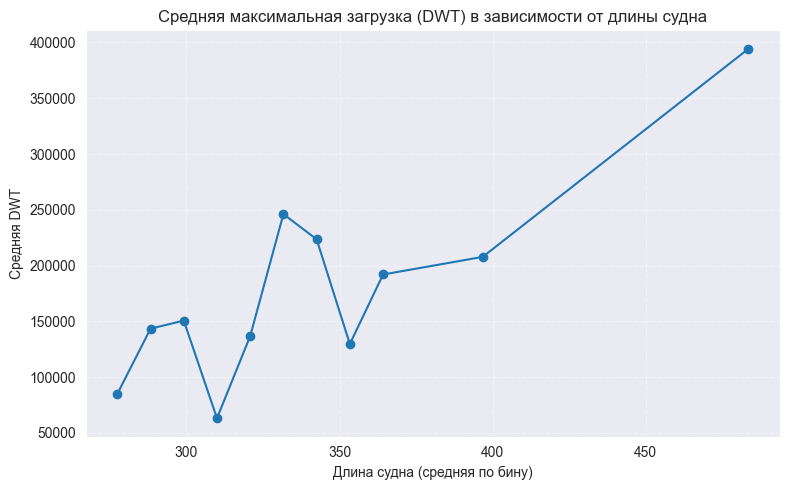

In [132]:
# 1) Средняя DWT в зависимости от длины
valid = df[[length_col, dwt_col]].dropna()

n_bins = min(20, max(5, valid[length_col].nunique()))
bins = np.linspace(valid[length_col].min(), valid[length_col].max(), n_bins + 1)

grouped = pd.cut(valid[length_col], bins, include_lowest=True)

avg = valid.groupby(grouped, observed=True)[dwt_col].mean().reset_index()

x = avg.iloc[:, 0].apply(lambda iv: (iv.left + iv.right) / 2.0)
y = avg[dwt_col].values

plt.figure()
plt.plot(x, y, marker="o")
plt.title("Средняя максимальная загрузка (DWT) в зависимости от длины судна")
plt.xlabel("Длина судна (средняя по бину)")
plt.ylabel("Средняя DWT")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

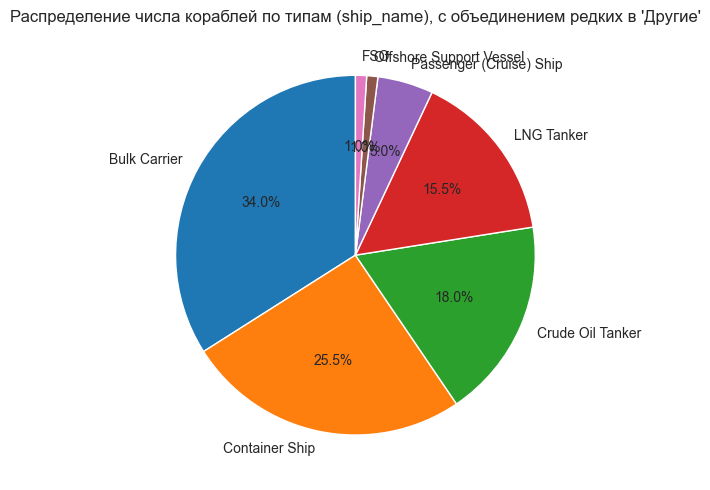

In [133]:
# 2) Распределение количества кораблей по типам с объединением редких в 'Другие'
counts = df[type_col].fillna("Неизвестно").astype(str).value_counts()
N = 8 if len(counts) > 9 else len(counts)
top = counts.iloc[:N]
other_sum = counts.iloc[N:].sum() if len(counts) > N else 0
plot_counts = top.copy()
if other_sum > 0:
    plot_counts.loc["Другие"] = other_sum

plt.figure()
plt.pie(plot_counts.values, labels=plot_counts.index, autopct="%1.1f%%", startangle=90)
plt.title(f"Распределение числа кораблей по типам ({type_col}), с объединением редких в 'Другие'")
plt.tight_layout()
plt.show()


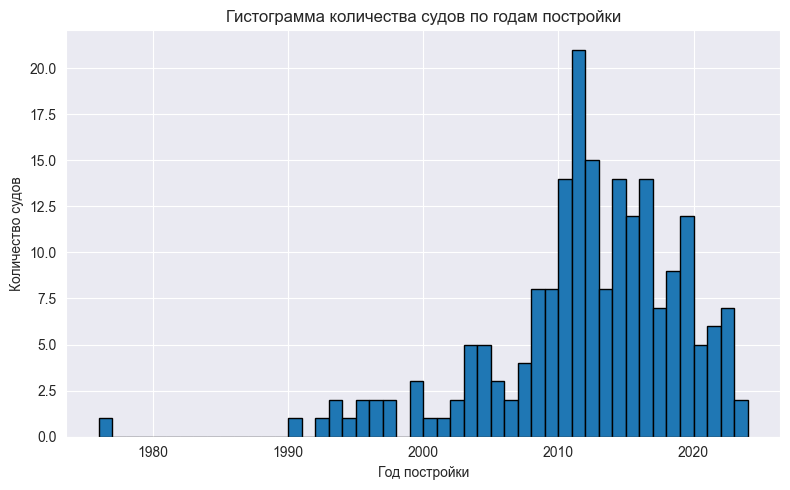

In [134]:
# 3) Гистограмма по годам постройки
years = df[year_col].dropna().astype(int)
year_min, year_max = years.min(), years.max()
bins = range(int(year_min), int(year_max) + 2)  # по годам
plt.figure()
plt.hist(years, bins=bins, edgecolor="black")
plt.title("Гистограмма количества судов по годам постройки")
plt.xlabel("Год постройки")
plt.ylabel("Количество судов")
plt.tight_layout()
plt.show()


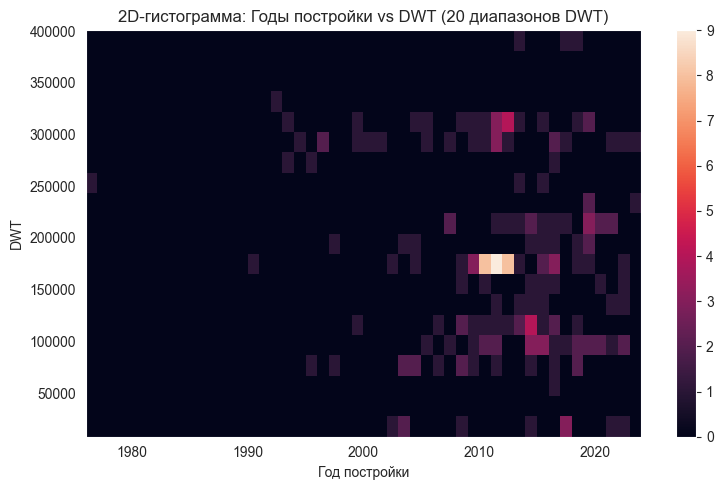

In [135]:
# 4) 2D-гистограмма: built_year vs DWT (20 диапазонов DWT)
sub = df[[year_col, dwt_col]].dropna()
years = sub[year_col].astype(int)
dwt_vals = sub[dwt_col].astype(float)

y_min, y_max = years.min(), years.max()
if y_max - y_min > 60:
    y_bins = np.linspace(y_min, y_max + 1, 41)
else:
    y_bins = np.arange(y_min, y_max + 2, 1)

d_min, d_max = dwt_vals.min(), dwt_vals.max()
if d_max == d_min:
    d_bins = np.linspace(d_min, d_max + 1, 21)
else:
    d_bins = np.linspace(d_min, d_max, 21)

plt.figure()
h = plt.hist2d(years, dwt_vals, bins=[y_bins, d_bins])
plt.colorbar()
plt.title("2D-гистограмма: Годы постройки vs DWT (20 диапазонов DWT)")
plt.xlabel("Год постройки")
plt.ylabel("DWT")
plt.tight_layout()
plt.show()


==================================================================================================================================

# Визуализация датасета Iris

В этом ноутбуке:
1. **Парная диаграмма (Pairplot)** для всего датасета.
2. **Скрипичные диаграммы (Violinplot)** для всех четырёх признаков по видам ирисов (для каждого признака — отдельные «скрипки» по видам).

> Ожидается файл `iris.csv` со столбцами: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, `species`.
Если файл не найден, ноутбук автоматически загрузит встроенный датасет Iris из seaborn и сохранит в `iris.csv` рядом с ноутбуком.


In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Настройки отображения графиков
%matplotlib inline

In [137]:
csv_path = r"IRIS.csv"
df = pd.read_csv(csv_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


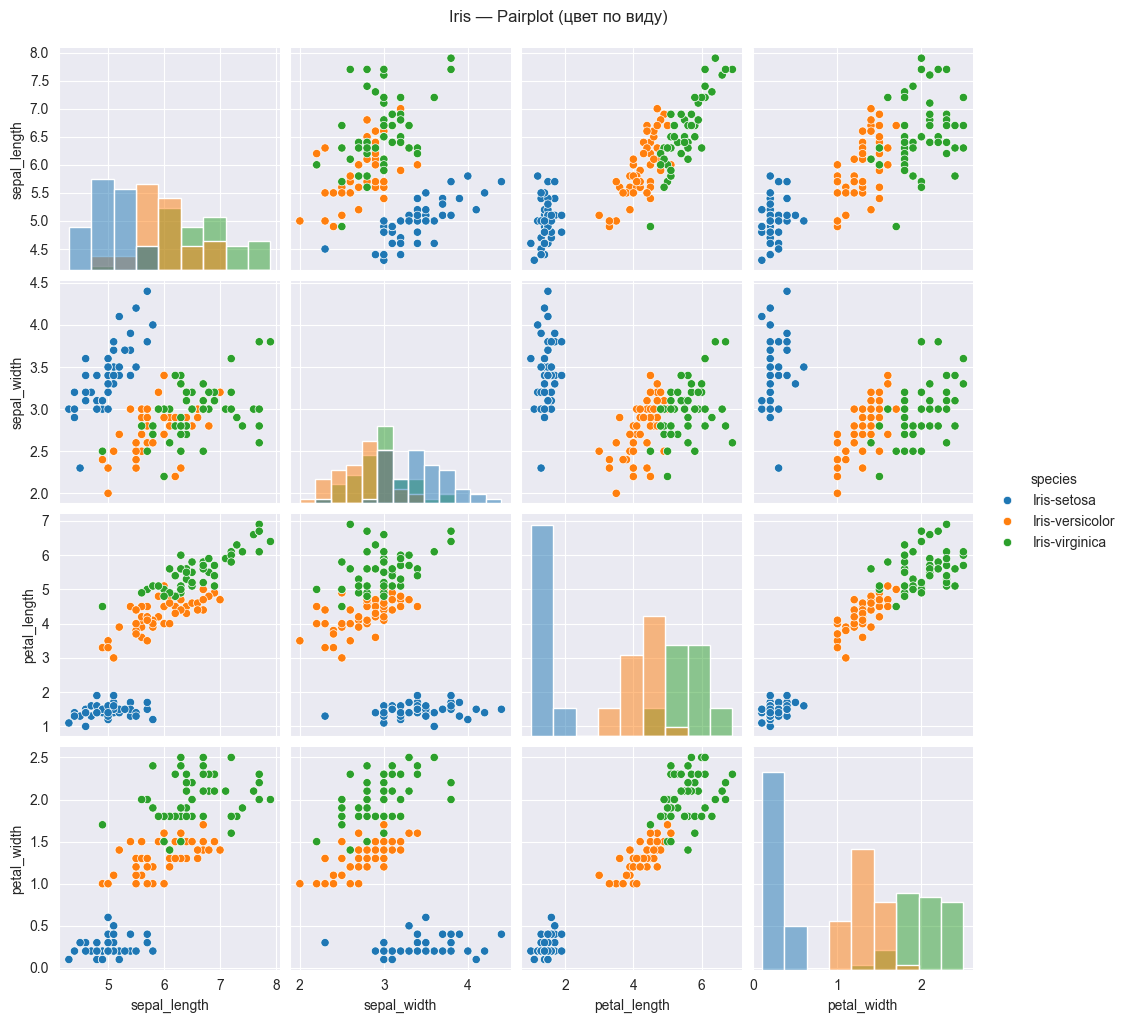

In [138]:
# 1) Парная диаграмма (Pairplot)
g = sns.pairplot(
    df,
    hue='species',
    diag_kind='hist',
    corner=False
)
g.fig.suptitle('Iris — Pairplot (цвет по виду)', y=1.02)
plt.show()


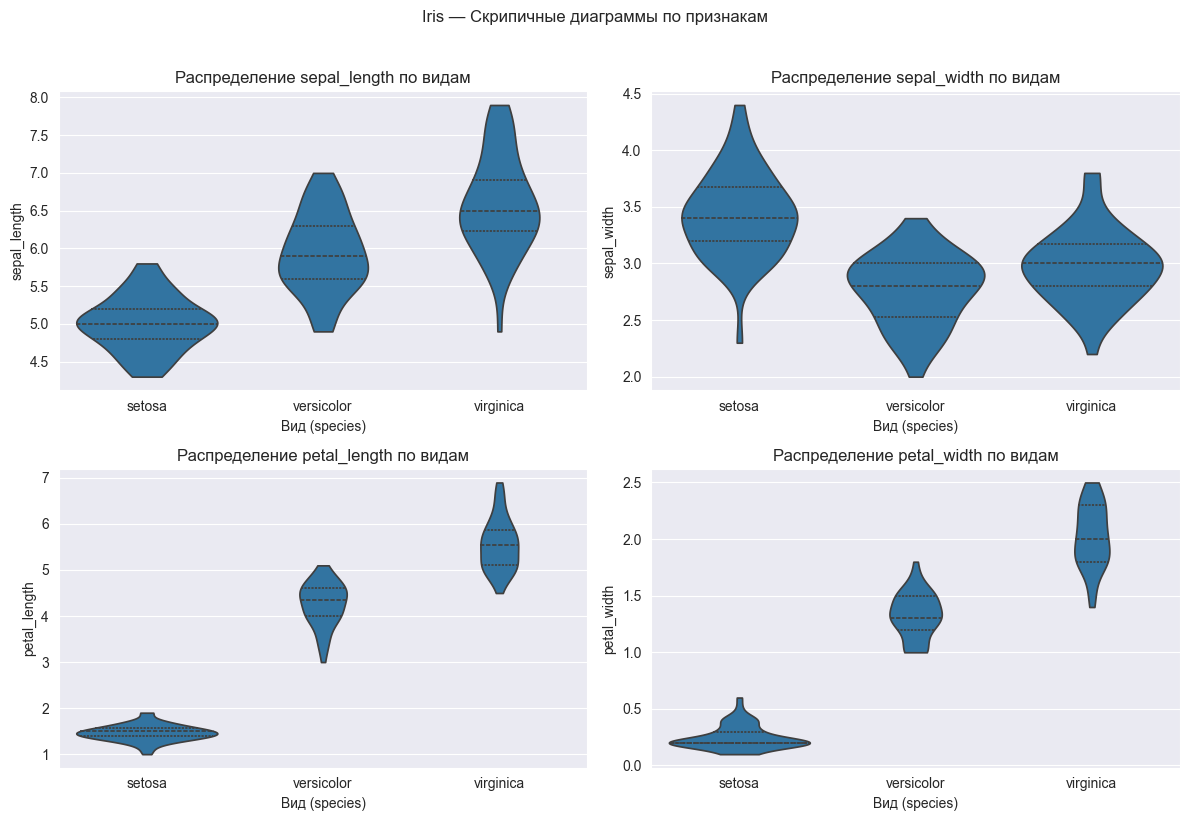

In [139]:

# Загрузка датасета iris (если не загружен ранее)
iris = sns.load_dataset('iris')

# 2) Скрипичные диаграммы (Violinplot) для каждого признака по видам
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = 'species'

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.violinplot(
        data=iris,
        x=species, y=feat,
        ax=ax,
        inner='quartile',  # внутри покажем квартильные линии
        cut=0
    )
    ax.set_title(f'Распределение {feat} по видам')
    ax.set_xlabel('Вид (species)')
    ax.set_ylabel(feat)

fig.suptitle('Iris — Скрипичные диаграммы по признакам', y=1.02)
plt.tight_layout()
plt.show()

==================================================================================================================================

# Анализ датасета Heart

**Цель:** визуализировать данные из `heart.csv` (не менее трёх разных графиков) и под каждым дать краткие выводы.
**Принципы:** KISS, DRY, YAGNI. На каждом графике есть легенда. Код — в стиле PEP8.


In [140]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

%matplotlib inline
plt.rcParams.update({"figure.figsize": (8, 5), "axes.grid": True})

In [141]:
csv_path = r"heart.csv"
df = pd.read_csv(csv_path)
df.columns = [c.lower() for c in df.columns]

display(df.head())


,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [142]:
# 1) Нормализуем имена колонок: нижний регистр, пробелы/символы -> _
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r'[^a-z0-9]+', '_', regex=True))

# 2) Синонимы (минимально необходимые поля)
ALIASES = {
    'age':     ['age'],
    'sex':     ['sex', 'gender'],
    'cp':      ['cp', 'chest_pain', 'chestpain', 'chest_pain_type'],
    'trestbps':['trestbps', 'restingbp', 'resting_blood_pressure'],
    'chol':    ['chol', 'cholesterol'],
    'thalach': ['thalach', 'max_heart_rate', 'maxhr'],
    'target':  ['target', 'output', 'disease', 'has_disease', 'heart_disease'],
}

def resolve_columns(df, aliases):
    cols = set(df.columns)
    mapping, missing = {}, []
    for std, cands in aliases.items():
        # точное попадание
        found = next((c for c in cands if c in cols), None)
        # частичное (на всякий случай)
        if not found:
            found = next((c for c in cols if any(cand in c for cand in cands)), None)
        if found:
            mapping[std] = found
        else:
            missing.append(std)
    if missing:
        raise KeyError(
            f"Не найдены обязательные поля: {missing}\n"
            f"Доступные колонки: {list(df.columns)}"
        )
    return mapping

C = resolve_columns(df, ALIASES)
print("Колонки:", C)  # чтобы ты видел, что чему сопоставилось

# 3) Приведём типы и добавим метки (минимум для графиков)
for key in ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'target']:
    df[C[key]] = pd.to_numeric(df[C[key]], errors='coerce')

df['target_label'] = df[C['target']].map({0: 'No disease', 1: 'Disease'}).fillna('Unknown')
df['sex_label']    = df[C['sex']].map({0: 'Female', 1: 'Male'}).fillna('Unknown')

Колонки: {'age': 'age', 'sex': 'sex', 'cp': 'chestpaintype', 'trestbps': 'restingbp', 'chol': 'cholesterol', 'thalach': 'maxhr', 'target': 'heartdisease'}


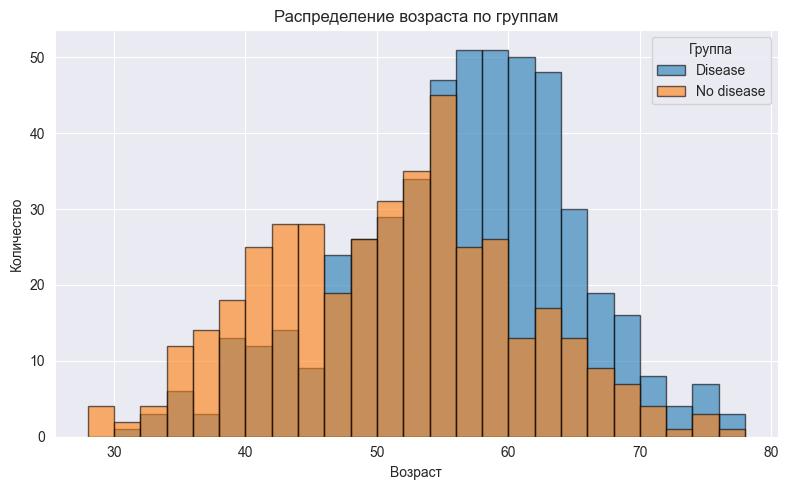


**Что визуализировали:** распределения возраста в группах Disease / No disease.
**Выводы:** средний возраст — Disease **55.9**, No disease **50.6**;
медианы — Disease **57.0**, No disease **51.0**.


In [143]:
# График 1: Гистограмма возраста по группам target
bins = np.arange(int(df[C['age']].min()), int(df[C['age']].max()) + 2, 2)

plt.figure()
for label, grp in df.groupby('target_label'):
    plt.hist(grp[C['age']].dropna(), bins=bins, alpha=0.6, label=label, edgecolor='black')

plt.title('Распределение возраста по группам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

# Средние и медианы по группам
mean_age = df.groupby('target_label')[C['age']].mean().round(1).to_dict()
med_age  = df.groupby('target_label')[C['age']].median().round(1).to_dict()

display(Markdown(f"""
**Что визуализировали:** распределения возраста в группах Disease / No disease.
**Выводы:** средний возраст — Disease **{mean_age.get('Disease','n/a')}**, No disease **{mean_age.get('No disease','n/a')}**;
медианы — Disease **{med_age.get('Disease','n/a')}**, No disease **{med_age.get('No disease','n/a')}**.
"""))

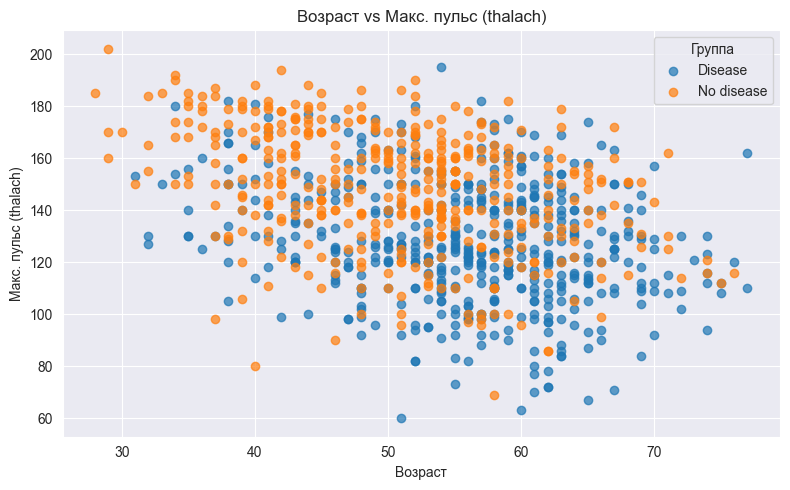


**Что визуализировали:** связь возраста и максимального пульса по группам.
**Выводы:** корреляция по всей выборке **-0.38** (обычно отрицательная — с возрастом максимальный пульс снижается).


In [144]:
# График 2: Scatter Age vs Thalach по группам target
plt.figure()
for label, grp in df.groupby('target_label'):
    plt.scatter(grp[C['age']], grp[C['thalach']], alpha=0.7, label=label)

plt.title('Возраст vs Макс. пульс (thalach)')
plt.xlabel('Возраст')
plt.ylabel('Макс. пульс (thalach)')
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

# Корреляция между возрастом и максимальным пульсом
corr = df[[C['age'], C['thalach']]].dropna().corr().iloc[0, 1]

display(Markdown(f"""
**Что визуализировали:** связь возраста и максимального пульса по группам.
**Выводы:** корреляция по всей выборке **{corr:.2f}** (обычно отрицательная — с возрастом максимальный пульс снижается).
"""))

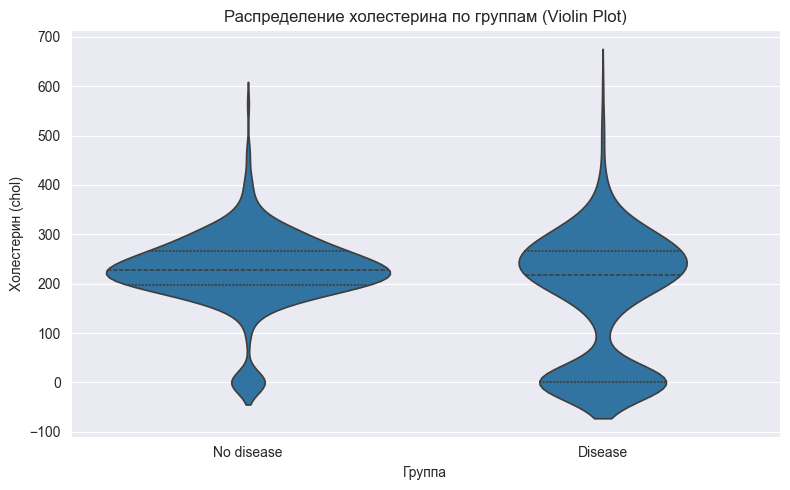


**Что визуализировали:** распределение холестерина для групп *Disease* и *No disease*.
**Выводы:** форма и ширина “скрипки” показывают, где сосредоточены значения —
шире = больше пациентов с таким уровнем холестерина.


In [145]:

plt.figure()
sns.violinplot(data=df, x='target_label', y=C['chol'], inner='quartile')
plt.title('Распределение холестерина по группам (Violin Plot)')
plt.xlabel('Группа')
plt.ylabel('Холестерин (chol)')
plt.tight_layout()
plt.show()

display(Markdown("""
**Что визуализировали:** распределение холестерина для групп *Disease* и *No disease*.
**Выводы:** форма и ширина “скрипки” показывают, где сосредоточены значения —
шире = больше пациентов с таким уровнем холестерина.
"""))